In [1]:
%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from inltk.inltk import setup,tokenize,get_embedding_vectors
import torch
torch.__version__

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


'1.3.1+cpu'

In [2]:
dataset = pd.read_csv('q1.csv')
print(dataset)
dataset = dataset[dataset['ans'].notna()] #returns the value with not NaN

   img_id                                                ans  marks
0   IMG01  ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...    5.0
1   IMG02  ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...    5.0
2   IMG03                                                NaN    3.0
3   IMG04  ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...    4.0
4   IMG05  ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...    1.0
..    ...                                                ...    ...
79  IMG80  ସାମନ୍ତ ସନ୍ଧି ୱେଲସେଲି ପ୍ରଣୟନ କରିଥଲେ ଇଂଗ୍ରେଜ଼ ମା...    4.5
80  IMG81  ଭାରତର ରାଜ୍ୟଗୁଡ଼ିକୁ ଅଧିକାର କରିବା ପାଇଁ ୱେଲସେଲି ସା...    3.0
81  IMG82  ଇଂଗ୍ରେଜ଼ ମାନେ ଭାରତରେ ବାଣିଜ୍ୟ କରିବାକୁ ଆସିଥିଲେ|ଭ...    2.0
82  IMG83  ସାମନ୍ତ ସନ୍ଧି ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ ଇଂଗ୍ରେଜ଼ ମ...    4.5
83  IMG84  ଇଂଗ୍ରେଜ଼ ମାନଙ୍କ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱେଲସେଲି...    5.0

[84 rows x 3 columns]


In [3]:
dataset = dataset.astype({'marks' : int})

# Tokenization and Vectorization

In [4]:
def ans_tokenize(answer):
    token = []
    token_count = []
    for ans in answer:
        token.append(tokenize(str(ans),'or'))
        token_count.append((len(tokenize(str(ans),'or'))))
    dataset.insert(2, 'no of tokens/words', token_count) #inserted the no_of_tokens into the df at col 2
    return token

In [5]:
answer = []
for ans in dataset['ans']:
    answer.append(ans)
token = []
token = ans_tokenize(answer)

In [6]:
dataset

,img_id,ans,no of tokens/words,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,178,5
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,211,5
3,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,97,4
4,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,104,1
5,IMG06,ଭାରତରେ ଇଂଗ୍ରେଜ଼ ମାନଂକ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱ...,137,5
...,...,...,...,...
79,IMG80,ସାମନ୍ତ ସନ୍ଧି ୱେଲସେଲି ପ୍ରଣୟନ କରିଥଲେ ଇଂଗ୍ରେଜ଼ ମା...,123,4
80,IMG81,ଭାରତର ରାଜ୍ୟଗୁଡ଼ିକୁ ଅଧିକାର କରିବା ପାଇଁ ୱେଲସେଲି ସା...,111,3
81,IMG82,ଇଂଗ୍ରେଜ଼ ମାନେ ଭାରତରେ ବାଣିଜ୍ୟ କରିବାକୁ ଆସିଥିଲେ|ଭ...,171,2
82,IMG83,ସାମନ୍ତ ସନ୍ଧି ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ ଇଂଗ୍ରେଜ଼ ମ...,92,4


In [7]:
# no. of words for determing vector length(to be used for padding/trimming)
pad_length = 124  # max no of words

In [8]:
%time
#initiating vector series to store
vectors = pd.Series([], dtype=float)

for row_index,row in dataset.iterrows():
    vect = get_embedding_vectors(str(row['ans']),'or')
    l = len(vect)
    vect = np.asarray(vect, np.float32)
    vect = vect.flatten()
    vect = vect.tolist()
    if l < pad_length:
        vect.extend([0] * ((pad_length-l)*400))
    elif l > pad_length:
        vect = vect[:(pad_length*400)]
    vectors[row_index] =  vect
    
dataset.insert(2, 'vectors', vectors) #inerting vectors into the df at col 2

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs


/mnt/d/Documents/Major_Project/answer_evaluator/venv/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/d/Documents/Major_Project/answer_evaluator/venv/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'fastai.text.models.awd_lstm.AWD_LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/mnt/d/Documents/Major_Project/answer_evaluator/venv/lib/python3.6/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torc

In [9]:
# Checking if padding worked correctly 

for row_index,row in dataset.iterrows():    # this prints the row index where vector length is not correct
    if len(row['vectors']) != (pad_length*400):
        print(len(row['vectors'])," row index- ",row_index)

In [10]:
dataset.head()

,img_id,ans,vectors,no of tokens/words,marks
0,IMG01,ଇଂଗରେଜକଂ ସାମରାଜ୍ୟ କୁ ସୁଦୃଢ କରିବା ପାଇଁ ୱେଲସେଲି ...,"[-0.0925297662615776, 0.10215654224157333, 0.3...",178,5
1,IMG02,ଇଂଗରେଜକଂ ପ୍ରଭାବିତ ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ରାଜ୍ୟାଭିଳ...,"[-0.0925297662615776, 0.10215654224157333, 0.3...",211,5
3,IMG04,ସାମନ୍ତ ସନ୍ଧି ପ୍ରଥା ୱେଲସେଲି ପ୍ରଣୟନ କରିଥିଲେ|ଏହାର...,"[0.31345227360725403, 0.5339254140853882, 0.22...",97,4
4,IMG05,ସାମନ୍ତ ସନ୍ଧି ଲର୍ଡ଼ ମାକଏଲେକଂ ଦ୍ୱାରା ପ୍ରଣୀତ ହୋଇଥ...,"[0.31345227360725403, 0.5339254140853882, 0.22...",104,1
5,IMG06,ଭାରତରେ ଇଂଗ୍ରେଜ଼ ମାନଂକ ସାମ୍ରାଜ୍ୟ ବିସ୍ତାର ପାଇଁ ୱ...,"[0.05895719677209854, -0.10473746806383133, -0...",137,5


# Training and Testing with classifiers

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

In [12]:
lr = LinearRegression()
dtc = DecisionTreeClassifier(min_samples_split=20)
rfc = RandomForestClassifier(n_estimators=26, random_state=200)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(dataset['vectors'], dataset['marks'], test_size=0.2, random_state=22)

In [14]:
x_train = x_train.tolist()
x_test = x_test.tolist()

In [15]:
pd_estimator = []

In [16]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)
    return clf

In [17]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [18]:
%%time

clf = train_classifier(lr, x_train, y_train)
pred = predict_labels(lr,x_test)
pd_estimator.append(('Linear Regressor', clf.score(x_test, y_test)*100))
print('Accuracy: ',clf.score(x_test, y_test)*100)

Accuracy:  18.150059820779486
CPU times: user 4.16 s, sys: 1.12 s, total: 5.28 s
Wall time: 1.17 s


In [19]:
%%time

clf = train_classifier(dtc, x_train, y_train)
pred = predict_labels(dtc,x_test)
pd_estimator.append(('Decision Tree Classifier', clf.score(x_test, y_test)*100))
print('Accuracy: ',clf.score(x_test, y_test)*100)

Accuracy:  35.714285714285715
CPU times: user 1.61 s, sys: 188 ms, total: 1.8 s
Wall time: 1.35 s


In [20]:
%%time

clf = train_classifier(rfc, x_train, y_train)
pred = predict_labels(rfc,x_test)
pd_estimator.append(('Random Forest Classifier', clf.score(x_test, y_test)*100))
print('Accuracy: ',clf.score(x_test, y_test)*100)

Accuracy:  50.0
CPU times: user 703 ms, sys: 0 ns, total: 703 ms
Wall time: 689 ms


In [21]:
scoring = pd.DataFrame(pd_estimator, columns=['Model', 'Accuracy'])
scoring

,Model,Accuracy
0,Linear Regressor,18.150060
1,Decision Tree Classifier,35.714286
2,Random Forest Classifier,50.000000


<BarContainer object of 3 artists>

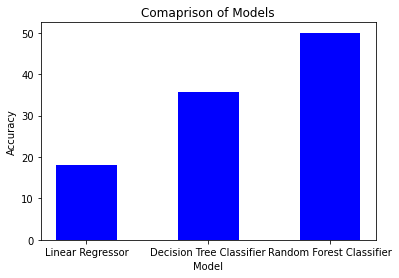

In [22]:
x = scoring['Model']
y = scoring['Accuracy']
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comaprison of Models')
plt.bar(x, y, color='#96b5e3', width=0.5)